# Exploratory Data Analysis 

## Importing the Libraries

In [1]:
import os
import re
import sys
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## About the data

For this project we are using The Subset of Million Playlist Dataset, as it's name implies,the dataset consists of one million playlists and each playlists contains n number of songs and some metadata is included as well such as name of the playlist, duration, number of songs, number of artists, etc.

It's made up of playlists selected from the billions of playlists created by Spotify users throughout the years. At random, playlists that met the following criteria were chosen:

* Created by a person who is at least 13 years old and lives in the United States Was this a public playlist when the MPD was created? 
* There are no more than 250 tracks 
* There are at least 5 tracks At least three distinct artists are represented
* Has no more than 250 tracks 
* Has at least three distinct artists 
* Has at least two distinct albums 
* Has no local tracks (non-Spotify music that a user has on their local device) 
* Has at least one follower (not including the creator)
* Was made between January 1, 2010 and December 1, 2017 
* Does not have an offensive title 
* Does not contain an adult-oriented title if the playlist was made by a user under the age of 18


## EDA for one json file which contains 1000 playlist

In [17]:
data = json.load(open('data/mpd.slice.0-999.json'))

# We want the playlists data
df = pd.DataFrame(data["playlists"])
df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,"[{'pos': 0, 'artist_name': 'Katrina', 'track_u...",8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,"[{'pos': 0, 'artist_name': 'PARTYNEXTDOOR', 't...",13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,"[{'pos': 0, 'artist_name': 'LoveRance', 'track...",63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,"[{'pos': 0, 'artist_name': 'Hunter Hayes', 'tr...",37,24950143,40,NaN


### Best Playlist 

In [21]:
df['num_followers'].max()

1038

In [3]:
best_playlist = df[df['num_followers'] == 1038]['name']
print("Best Playlist\n", best_playlist)
df[df['num_followers'] == 1038]

Best Playlist
 765    Tangled
Name: name, dtype: object


,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
765,Tangled,false,765,1499040000,81,37,1038,"[{'pos': 0, 'artist_name': 'Mandy Moore', 'tra...",15,15112167,59,NaN


### Relationship between number of playlist followers and number of artists in that playlist

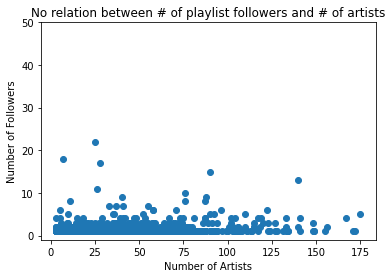

In [4]:
plt.plot( df['num_artists'], df['num_followers'], 'o')

# Set limits to avoid the outlier
plt.ylim(-1,50)
plt.title("No relation between # of playlist followers and # of artists")
plt.xlabel("Number of Artists")
plt.ylabel("Number of Followers")
plt.show()

### Relationship between number of playlist followers and number of edits of that playlist

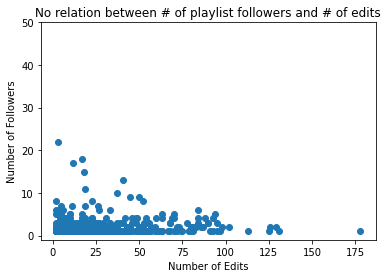

In [5]:
plt.plot( df['num_edits'], df['num_followers'], 'o')

# Set limits to avoid the outlier
plt.ylim(-1,50)
plt.title("No relation between # of playlist followers and # of edits")
plt.xlabel("Number of Edits")
plt.ylabel("Number of Followers")
plt.show()

## Taking the tracks from each playlist and creating a separate dataframe for it

In [6]:
track_df = []
pl_counter = 0
for track in df['tracks']:
    for one_track in track:
        x = list(one_track.values())
        
        # Making sure each track in the dataframe has a column to indicate which playlist they came from
        x.append(df['name'][pl_counter])
        track_df.append(x)
    pl_counter += 1

track_df = pd.DataFrame(track_df, columns = ['Playlist_pos', 'artist_name','track_uri','artist_uri','track_name','album_uri','duration_ms','album_name','playlist'])  

# Checking if our data frame is correct
track_df.head(10)

,Playlist_pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,playlist
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,Throwbacks
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),Throwbacks
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,Throwbacks
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,Throwbacks
5,5,Usher,spotify:track:0XUfyU2QviPAs6bxSpXYG4,spotify:artist:23zg3TcAtWQy7J6upgbUnj,Yeah!,spotify:album:0vO0b1AvY49CPQyVisJLj0,250373,Confessions,Throwbacks
6,6,Usher,spotify:track:68vgtRHr7iZHpzGpon6Jlo,spotify:artist:23zg3TcAtWQy7J6upgbUnj,My Boo,spotify:album:1RM6MGv6bcl6NrAG8PGoZk,223440,Confessions,Throwbacks
7,7,The Pussycat Dolls,spotify:track:3BxWKCI06eQ5Od8TY2JBeA,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,Buttons,spotify:album:5x8e8UcCeOgrOzSnDGuPye,225560,PCD,Throwbacks
8,8,Destiny's Child,spotify:track:7H6ev70Weq6DdpZyyTmUXk,spotify:artist:1Y8cdNmUJH7yBTd9yOvr5i,Say My Name,spotify:album:283NWqNsCA9GwVHrJk59CG,271333,The Writing's On The Wall,Throwbacks
9,9,OutKast,spotify:track:2PpruBYCo4H7WOBJ7Q2EwM,spotify:artist:1G9G7WwrXka3Z1r7aIDjI7,Hey Ya! - Radio Mix / Club Mix,spotify:album:1UsmQ3bpJTyK6ygoOOjG1r,235213,Speakerboxxx/The Love Below,Throwbacks


### Checking which artists are featured most across all playlists for top 10 Artists

In [7]:
track_df['artist_name'].value_counts()

Drake                939
Kanye West           415
Kendrick Lamar       385
Rihanna              350
Eminem               332
                    ... 
Cherokee               1
J. Tillman             1
Radiator Hospital      1
Los Stellarians        1
Two Fresh              1
Name: artist_name, Length: 9722, dtype: int64

Text(0.5, 0, 'Total songs across playlists')

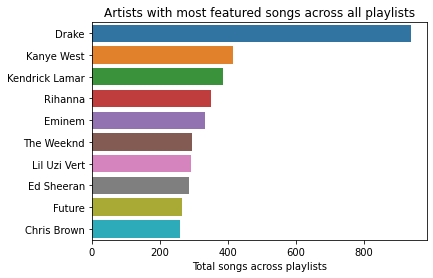

In [8]:
values = list(track_df['artist_name'].value_counts())
names = track_df['artist_name'].value_counts().index.tolist()

ax = sns.barplot(y=names[0:10], x=values[0:10])
ax.set_title('Artists with most featured songs across all playlists')
ax.set_xlabel('Total songs across playlists')

### Checking the distribution of song durations

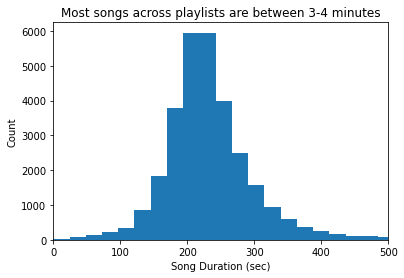

In [9]:
track_df['duration_sec'] = track_df['duration_ms']/1000
plt.title("Most songs across playlists are between 3-4 minutes")
plt.xlabel("Song Duration (sec)")
plt.ylabel("Count")
plt.hist(track_df.drop_duplicates(['track_name'], keep='first')['duration_sec'], bins = 100)
plt.xlim(0,500)
plt.show()

### Word Cloud of Playlist

In [10]:
a = track_df['playlist'].value_counts() 
a

Country                1741
rap                     578
Gym                     441
Worship                 424
Rock                    413
                       ... 
dank memes                5
oldies but goodies        5
MY FAV                    5
shower                    5
CR                        5
Name: playlist, Length: 869, dtype: int64

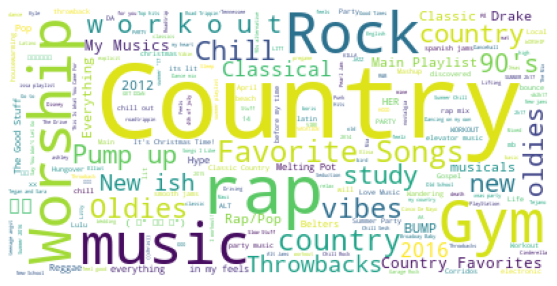

In [11]:
text = a

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(text)

# Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Cloud of Artists

In [12]:
b = track_df['artist_name'].value_counts() 
b

Drake                939
Kanye West           415
Kendrick Lamar       385
Rihanna              350
Eminem               332
                    ... 
Cherokee               1
J. Tillman             1
Radiator Hospital      1
Los Stellarians        1
Two Fresh              1
Name: artist_name, Length: 9722, dtype: int64

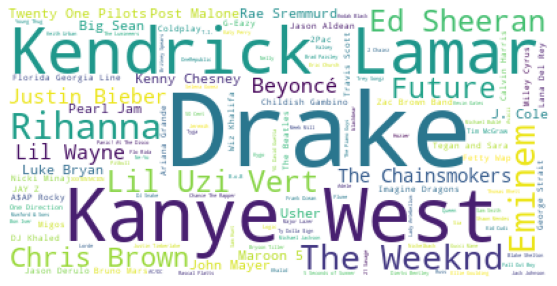

In [13]:
text = b

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(text)

# Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Enhancing the Data

Since Spotify released this dataset, it already includes a track id that can be used to perform API calls and access the various information offered by Spotify for a certain song, artist, or user.

These are some of the features accessible for each song, and we'll use them to improve our dataset and make it easier to match the user's favorite playlist.

The following are some of the available features, which are typically measured on a scale of 0-1:
- Danceability: a metric for determining how "danceable" a song is.
- Energy: a subjective assessment of activity and intensity.
- Instrumentality: whether or not a song has no vocals (pure instrumental).
- Liveness: refers to the presence of an audience in a song, such as at a performance.
- Loudness: The decibel level of a song.
- Mode: Minor or Major mode.
- Speechiness: in a song, the presence of words.
- Tempo: Beats per minute (BPM)

## Shapping the data

The 20,000 playlists were parsed through the Spotify API and the audio features for each song in each playlist were retrieved using the Spotify API. Due to the latency of the API calls, this was a highly time intensive process. Because of this reason the million playlist dataset was reduced to 20k.

Once the features were collected, the average of them were taken to have the audio features for the playlist with this, we reduced the dataset to a single row per playlist with a good feature representation of the contents of them.


In [14]:
# Opening the csv created in data preprocessing notebook
df1 = pd.read_csv('Playlist_Feats.csv')
df1

,name,pid,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Throwbacks,0,0.664077,0.781077,5.038462,-4.891212,0.692308,0.103698,0.083674,0.000674,0.187087,0.642750,121.157500,221777.461538,4.000000
1,Awesome Playlist,1,0.492382,0.695923,4.461538,-8.107974,0.538462,0.091010,0.162227,0.223708,0.179344,0.476667,124.987128,298837.641026,3.769231
2,korean,2,0.671062,0.692953,5.000000,-4.875594,0.515625,0.096425,0.269100,0.000638,0.168894,0.565078,114.595984,219373.953125,4.000000
3,mat,3,0.514429,0.620902,5.103175,-9.618754,0.714286,0.067000,0.273514,0.203156,0.188278,0.451258,125.547627,229575.055556,3.952381
4,90s,4,0.576235,0.650418,3.352941,-7.634529,0.823529,0.041218,0.177189,0.081759,0.166524,0.490294,127.725412,255014.352941,3.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,gang gang,115995,0.804590,0.529051,4.205128,-8.164205,0.589744,0.219638,0.217950,0.008621,0.166574,0.363638,129.452333,230348.358974,4.000000
19996,Chaos,115996,0.688900,0.695500,5.700000,-8.232650,0.400000,0.104215,0.243258,0.225892,0.151770,0.717800,135.314300,283091.000000,4.050000
19997,Spring 2014,115997,0.646571,0.603214,5.357143,-6.890929,0.714286,0.078743,0.227477,0.024347,0.146629,0.442571,125.139071,268988.928571,4.000000
19998,autumn,115998,0.549943,0.562457,5.114286,-8.666057,0.657143,0.065520,0.273361,0.018066,0.161580,0.390406,114.144886,237814.542857,3.971429


In [15]:
df1.describe()

,pid,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,87599.500000,0.605420,0.637989,5.173814,-7.354372,0.659661,0.092845,0.240672,0.060453,0.187361,0.489430,121.312841,2.346327e+05,3.942266
std,41071.372952,0.095700,0.131597,0.670863,2.470870,0.155849,0.056410,0.171864,0.126385,0.042966,0.126688,7.386653,3.333551e+04,0.097885
min,0.000000,0.145480,0.021910,0.571429,-31.669286,0.000000,0.028663,0.000430,0.000000,0.076900,0.005664,79.758375,7.116671e+04,2.888889
25%,100999.750000,0.547073,0.573418,4.810811,-8.216312,0.548320,0.051397,0.126023,0.002129,0.161836,0.410242,116.987634,2.190581e+05,3.918367
50%,105999.500000,0.607856,0.655280,5.176471,-6.776432,0.647059,0.074525,0.187602,0.014285,0.182391,0.485716,121.390009,2.305715e+05,3.969941
75%,110999.250000,0.673903,0.726240,5.539867,-5.823076,0.777778,0.116656,0.305649,0.055398,0.205382,0.570721,125.717134,2.447041e+05,4.000000
max,115999.000000,0.862938,0.974920,9.166667,-2.002714,1.000000,0.928033,0.993437,0.928300,0.812440,0.958706,172.767810,1.424500e+06,4.333333
